## GAN in tensorflow

print("print")

In [2]:
# from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os
import time

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def xavier_init(shape):
    in_dim = shape[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=shape, stddev=xavier_stddev)

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [4]:
# Weights and biases
D_w1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(xavier_init(shape=[128]))
D_w2 = tf.Variable(xavier_init(shape=[128,1]))
D_b2 = tf.Variable(xavier_init(shape=[1]))
D_list = [D_w1, D_w2, D_b1, D_b2]

def discriminator(images):
    
    temp = tf.nn.relu(tf.matmul(images,D_w1) + D_b1)
    D_logit = tf.matmul(temp, D_w2) + D_b2
    output = tf.nn.sigmoid(D_logit)
    
    return output, D_logit

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Weights and biases
G_w1 = tf.Variable(xavier_init(shape=[100,128]))
G_b1 = tf.Variable(xavier_init(shape=[128]))
G_w2 = tf.Variable(xavier_init(shape=[128,28*28]))
G_b2 = tf.Variable(xavier_init(shape=[28*28]))
G_list = [G_w1, G_w2, G_b1, G_b2] 

def generator(input_):
    
    temp = tf.nn.leaky_relu(tf.matmul(input_,G_w1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(temp, G_w2) + G_b2)
    
    return output

In [6]:
X = tf.placeholder(shape=[None, 28*28],dtype=tf.float32)
z = tf.placeholder(shape=[None,100],dtype=tf.float32)

In [7]:
G_sample = generator(z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

# D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
# G_loss = -tf.reduce_mean(tf.log(D_fake))

# Alternative losses:
# -------------------
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))



D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=D_list)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=G_list)

init = tf.global_variables_initializer()

Iter: 0
D loss: 1.713
G_loss: 2.196
Iter: 1000
D loss: 0.01789
G_loss: 6.812
Iter: 2000
D loss: 0.07869
G_loss: 4.417
Iter: 3000
D loss: 0.2077
G_loss: 4.895
Iter: 4000
D loss: 0.381
G_loss: 3.712
Iter: 5000
D loss: 0.3228
G_loss: 4.379
Iter: 6000
D loss: 0.3329
G_loss: 3.304
Iter: 7000
D loss: 0.3347
G_loss: 3.475
Iter: 8000
D loss: 0.5446
G_loss: 2.773
Iter: 9000
D loss: 0.5402
G_loss: 2.851
44.431357860565186


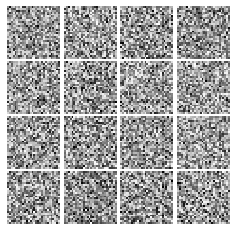

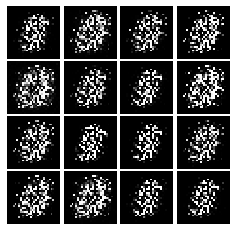

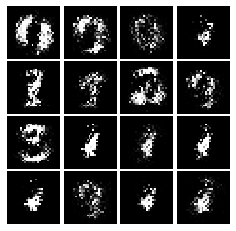

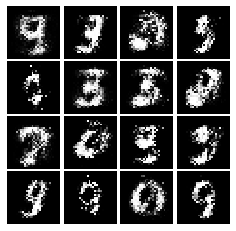

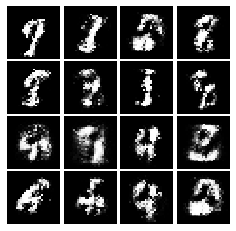

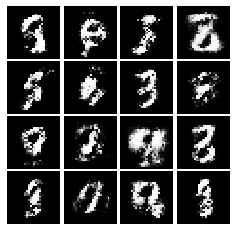

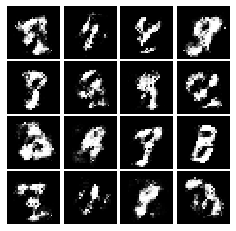

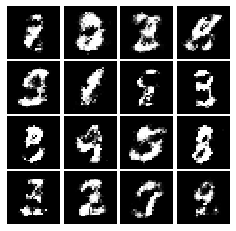

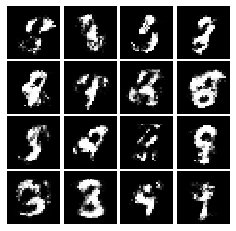

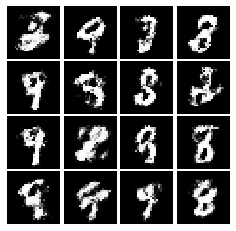

In [8]:
# def sample_Z(m, n):
#     '''Uniform prior for G(Z)'''
#     return np.random.uniform(-1., 1., size=[m, n])

if not os.path.exists('out/'):
    os.makedirs('out/')

to = time.time()
with tf.Session() as sess:
    sess.run(init)
    for it in range(10000):

        if it % 1000 == 0:
            samples = sess.run(G_sample, feed_dict={z: np.random.uniform(-1., 1., size=[16, 100])})
            plot(samples)
            
        X_mb, _ = mnist.train.next_batch(128)

        z_ = np.random.uniform(-1., 1., size=[128, 100])
        _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, z: z_})
        
        z_ = np.random.uniform(-1., 1., size=[128, 100])
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={z: z_})
        
        if it % 1000 == 0:
            print('Iter: {}'.format(it))
            print('D loss: {:.4}'. format(D_loss_curr))
            print('G_loss: {:.4}'.format(G_loss_curr))
print("Time spent on training ", time.time()-to, " seconds")

In [12]:
A = tf.Variable(tf.random.uniform(shape=[10000,10000]),dtype=tf.float32)
B = tf.Variable(tf.random.uniform(shape=[10000,10000]),dtype=tf.float32)
mul = tf.matmul(A,B)

to = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(mul)
  
print("Time spent on training ", time.time()-to, " seconds")

Time spent on training  8.081730127334595  seconds
